In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
from scipy import signal

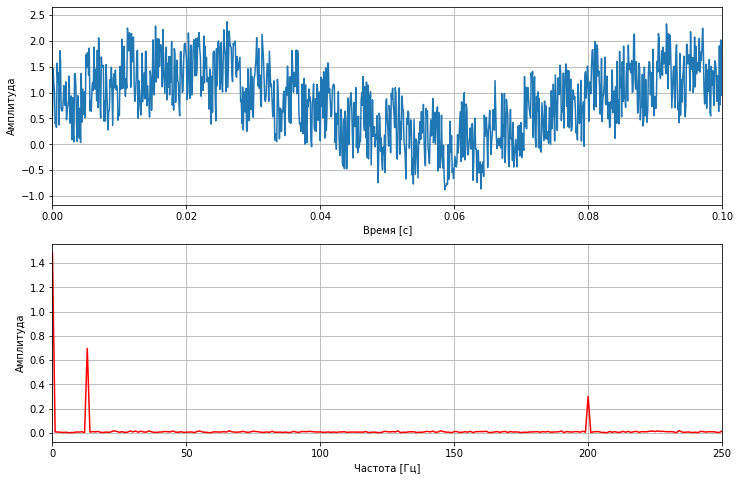

In [3]:
w1 = 13   ## частота первого синуса
w2 = 200  ## частота второго синуса
a1 = 0.7  ## амплитуда первого синуса
a2 = 0.3  ## амплитуда второго синуса
a3 = 1.5  ## амплитуда шума
Fs = 10000  ## частота дискретизации: 10 кГц
Ts = 1.0/Fs ## интервал времени между соседними точками

np.random.seed(42)

df = pd.DataFrame()
## ось времени
df['t'] = np.arange(0, 1, Ts)
## cигнал
df['y'] = a1*np.sin(2*np.pi*w1*df.t) + a2*np.sin(2*np.pi*w2*df.t) + a3*np.random.random(len(df))

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([0, 250])
ax[1].grid()


In [21]:
b, a = signal.butter(8, 250, fs=Fs)

In [22]:
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w

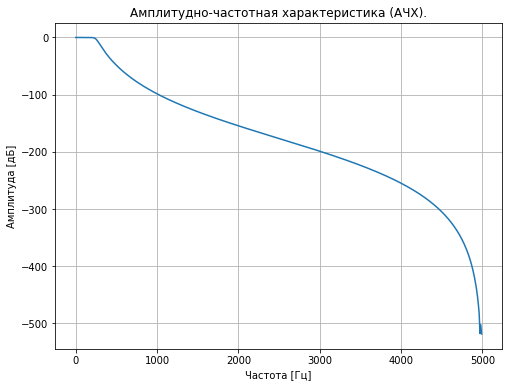

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
ax.plot(w, 20 * np.log10(abs(h)))
#ax.set_xlim([0, 200])
#ax.set_ylim([-35, 1])
ax.set_ylabel('Амплитуда [дБ]')
ax.set_xlabel('Частота [Гц]')
ax.set_title('Амплитудно-частотная характеристика (АЧХ).')
ax.grid()

In [24]:
ind = np.where((w > 254-5) & (w < 254+5))[0][0]

In [25]:
ind

26

In [27]:
20 * np.log10(abs(h[ind]))

-3.58482731435907

In [28]:
frq = np.fft.fftfreq(N, Ts)[range(int(N/2))]

In [29]:
df['y_filt'] = signal.filtfilt(b, a, df.y)

In [31]:
abs(df['y_filt']).mean()

0.7671850832654216

In [37]:
b, a = signal.cheby2(4, 40, 30, 'highpass', fs=Fs)

In [38]:
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w

In [39]:
ind = np.where((w > 29-1) & (w < 29+1))[0][0]

In [40]:
ind

3

In [41]:
20 * np.log10(abs(h[ind]))

-43.78778398147987

In [42]:
df['yy'] = signal.lfilter(b, a, df.y)

In [44]:
abs(df['yy']).mean()

0.3986233784132924